# Discovering Partial Periodic Frequent Pattern in Big Data Using PPF_DFS Algorithm

In this tutorial, we will discuss the first approach to find Partial Periodic Frequent Pattern in big data using PPF_DFS algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Partial Periodic Frequent Pattern using a single minimum support value


***

## <a id='basicApproach'>Basic approach: Executing PPF_DFS on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the PPF_DFS algorithm

In [1]:
from PAMI.partialPeriodicFrequentPattern.basic import PPF_DFS  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
maxPerCount = 500
minPRcount = 0.5
minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.

seperator = '\t'       

#### Step 3: Execute the PPF_DFS algorithm

In [3]:
obj = alg.PPF_DFS(iFile=inputFile, minSup=minimumSupportCount,maxPer=maxPerCount,minPR=minPRcount, sep=seperator)    #initialize
obj.startMine()            #Start the mining process

#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='partialPeriodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 20748


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 52.16012668609619


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 227500032
Memory (USS): 189075456


# Advanced Tutorial on Implementing PPF_DFS Algorithm

In this tutorial, we will discuss the second approach to find Partial Periodic Frequent Pattern in big data using PPF_DFS algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Partial Periodic Frequent Pattern using multiple minimum support values.

***

#### In this tutorial, we explain how the PPF_DFS algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the PPF_DFS algorithm and pandas data frame

In [1]:
from PAMI.partialPeriodicFrequentPattern.basic import PPF_DFS  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv'
seperator = '\t'
maximumPeriodCount = 500
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
minPRCount = 0.7
result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer','minPR','patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PPF_DFS algorithm

#### Step 3: Execute the PPF_DFS algorithm using a for loop

In [3]:
algorithm = 'PPF_DFS'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.PPF_DFS('https://u-aizu.ac.jp/~udayrage/datasets/temporalDatabases/Temporal_T10I4D100K.csv', minSup=minSupCount,maxPer=maximumPeriodCount,minPR=minPRCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maximumPeriodCount,minPRCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


#### Step 4: Print the results

In [4]:
print(result)

  algorithm  minSup  maxPer  minPR  patterns     runtime     memory
0   PPF_DFS    1000     500    0.7       385   18.932601  223969280
1   PPF_DFS    1500     500    0.7       237   40.386330  236941312
2   PPF_DFS    2000     500    0.7       155   66.637682  249569280
3   PPF_DFS    2500     500    0.7       107  100.948041  261464064
4   PPF_DFS    3000     500    0.7        60  158.192894  274657280


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

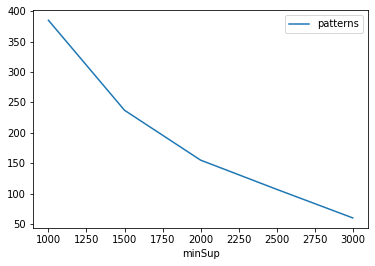

Graph for No Of Patterns is successfully generated!


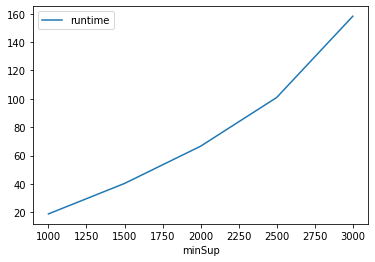

Graph for Runtime taken is successfully generated!


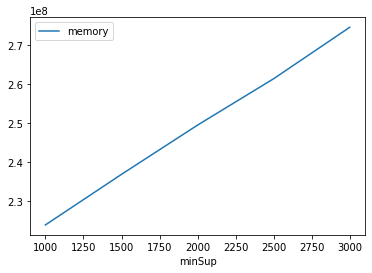

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
